# Preliminary Analysis of Alcoholic EEG Dataset

*Disclaimer: The data used in this analysis do not belong to be. I had acquired this dataset from University of California Irvine - Knowledge Discovery in Databases Archive. The original owner and donor are described below. This preliminary analysis script primarily serve as a learning module / tutorials for people interested in analyzing Electroencephalogram Recording using Python*

**Original Owner**<br>
Henri Begleiter<br>
Neurodynamics Laboratory, <br>
State University of New York Health Center<br>
Brooklyn, New York<br>

**Donor**<br>
Lester Ingber<br>
POB 06440 Sears Tower<br>
Chicago, IL 60606<br>
ingber@ingber.com<br>
Date Donated: October 13, 1999<br>

**Code Written By**<br>
Jackson Cagle<br>
Brain Mapping Laboratory, <br>
J. Crayton Pruitt Family Department of Biomedical Engineering, <br>
University of Florida <br>

## Dataset Description
This data arises from a large study to examine EEG correlates of genetic predisposition to alcoholism. It contains measurements from 64 electrodes placed on subject's scalps which were sampled at **256 Hz (3.9-msec epoch) for 1 second**.

There were **two groups of subjects: alcoholic and control**. Each subject was exposed to either a single stimulus (S1) or to two stimuli (S1 and S2) which were pictures of objects chosen from the 1980 Snodgrass and Vanderwart picture set. When two stimuli were shown, they were presented in either a matched condition where S1 was identical to S2 or in a non-matched condition where S1 differed from S2.

There were 122 subjects and each subject completed 120 trials where different stimuli were shown. The electrode positions were located at standard sites (Standard Electrode Position Nomenclature, American Electroencephalographic Association 1990). **Zhang et al. (1995)** describes in detail the data collection process.

## Literature Review - and Summaries
### [1] X.L. Zhang, H. Begleiter, B. Porjesz, W. Wang, and A. Litke. (1995). "Event related potentials during object recognition tasks". Brain Research Bulletin. Volume 38. Number 6. Pages 531-538.
This is the original paper published with the EEG dataset in this study. The experiment is a simple 90-pictures Matching-Nonmatching Task with 1600ms inter-picture interval. Every 2 pictures (S1 and S2) are considered as one trial, and there is 3.2 seconds intertrial interval. The tasks are randomized into 50% Matching and 50% Nonmatching tasks. **The behavioral data (reaction time) described in the paper is not included in the shared datasets.**

The Electroencephalogram recording is 64-Channel Recording, which includes 61-Channel EEG, 2 Channel EOG, and 1 Channel Ground (Nose). The 2 Channel EOG are X, and Y, which should be remove and analyzed separately. 

The primary discovery of this paper are 1) The significance findings all occur in occipito-temperal region, 2) the Event Related Potential Peak at 250ms is significantly different for Matching and NonMatching Condition, 3) the latency of the peak at 250ms was shortened for matching compared to nonmatching condition, 4) they described the evoke potential at 250ms as Visual Memory Potential which contributed to Visual Short-term Memory. **This paper focus on ERP analysis instead of looking for the difference between Alcoholic and Control subjects.**

# Main Source Code

## Include libraries used in this source code
This analysis is built upon MNE (MEG + EEG Analysis and Visualization), to obtain this library please visit http://martinos.org/mne/stable/index.html

In [1]:
import mne
#%matplotlib inline 
import numpy as np
import pandas as pd
import fnmatch, os

Dataset_Path = "D:/Users/jcagle/Documents/Datasets/Alcoholic EEG/"

## Custom functions for analysis

In [2]:
def fullPath(directory, pattern):
    files = os.listdir(directory)
    selectedFiles = []
    for filename in files:
        if fnmatch.fnmatch(filename, pattern):
            selectedFiles.append(directory + filename)
    return selectedFiles

def strfind(df, string):
    index = []
    for x in range(len(df)):
        if df[x] == string:
            index.append(x)
    return index

class dataStruct:
    def __init__(self, n_epochs, electrodes):
        # Setup dataStruct
        self.numTrials = 0
        self.data = np.empty([n_epochs, 64, 256], dtype=np.float32)
        self.trialType = np.empty([n_epochs,1],dtype=np.int8)
        self.trialStatus = np.empty_like(self.trialType)
        
        # Load Information for MNE
        self.eeg_ch = electrodes[0] == 'eeg'
        self.eog_ch = electrodes[0] == 'eog'
        Montage = mne.channels.read_montage(kind='standard_1020',ch_names=electrodes[1][self.eeg_ch].tolist())
        self.info = mne.create_info(ch_names=electrodes[1].tolist(), ch_types=electrodes[0].tolist(), sfreq=256, montage=Montage)
        
    def addTrial(self, filename):
        self.data[self.numTrials,:,:] = np.genfromtxt(filename, delimiter=",")
        self.numTrials = self.numTrials + 1
        
    def addStatus(self, filename):
        data = np.genfromtxt(filename, delimiter=",")
        self.trialType = data[:,0]
        self.trialStatus = data[:,1]
        
    def importMNE(self):
        self.EpochsArray = mne.EpochsArray(self.data[:,np.transpose(self.eeg_ch),:], info=self.info)

## Step 1. Import Raw Signal from CSV file
This Step will import the data file saved in CSV format to a user-defined dataStruct class. To hold all subjects, we defined a dictionary (non-default dictionary, so error will raise if incorrect ID is called), and the dictionality key will point toward a dataStruct holding the data we imported. The detail of dataStruct class is shown above.

In [17]:
# Prepare Datastruct and Electrodes Location for MNE
Data = dict()
electrodeConfig = pd.read_csv(Dataset_Path + "Electrodes.config",header=None)

for Subject in os.listdir(Dataset_Path):
    if Subject.startswith("co"):
        Trials = fullPath(Dataset_Path + Subject + "/", "*rd*.csv")
        TrialStatus = fullPath(Dataset_Path + Subject + "/", Subject + ".csv")
        Data[Subject] = dataStruct(len(Trials), electrodeConfig)
        Data[Subject].addStatus(TrialStatus[0])
        for trial in Trials:
            Data[Subject].addTrial(trial)

#np.save(Dataset_Path + "Python_Raw.npy", Data)                        

In [4]:
Data = np.load(Dataset_Path + "Python_Raw.npy")

<function ndarray.choose>

In [77]:
EA = mne.EpochsArray(data,Data['co2a0000364'].info)

88 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


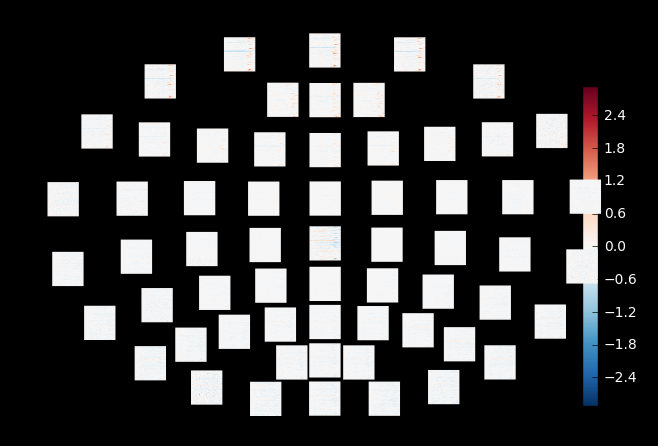

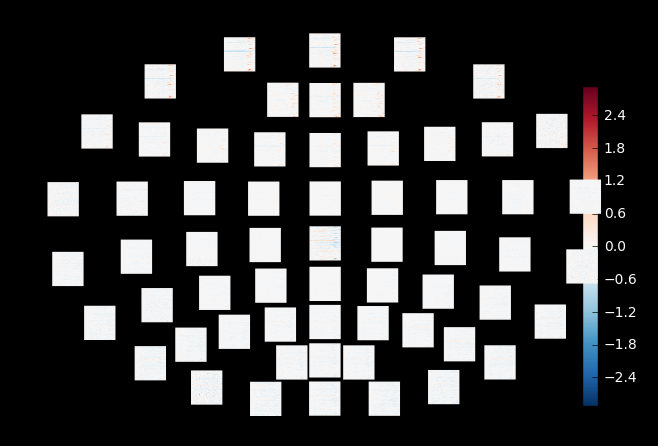

In [92]:
EA.plot_topo_image()

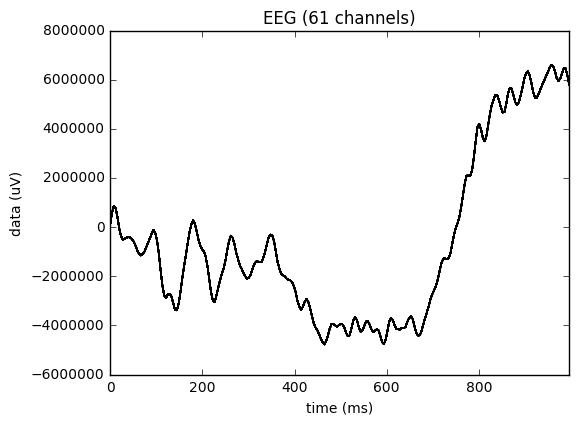

In [45]:
plt = meanERP.plot()

In [57]:
mne.channels.read_montage(kind='standard_1020',ch_names=A[A[0] == 'eeg',1])

TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [85]:
A = A[A[0] == 'eeg']
print(len(list(A[1])))
montage = mne.channels.read_montage(kind='standard_1020',ch_names=list(A[1]))
len(montage.ch_names)

61


61

In [81]:
#montage.ch_names[1]

for x in list(A[1]):
    Find = False
    for y in montage.ch_names:
        if x == y:
            Find = True
    if not Find:
        print(x)
        
#default = mne.channels.read_montage(kind='standard_1020')

FPz


In [82]:
default.ch_names

['LPA',
 'RPA',
 'Nz',
 'Fp1',
 'Fpz',
 'Fp2',
 'AF9',
 'AF7',
 'AF5',
 'AF3',
 'AF1',
 'AFz',
 'AF2',
 'AF4',
 'AF6',
 'AF8',
 'AF10',
 'F9',
 'F7',
 'F5',
 'F3',
 'F1',
 'Fz',
 'F2',
 'F4',
 'F6',
 'F8',
 'F10',
 'FT9',
 'FT7',
 'FC5',
 'FC3',
 'FC1',
 'FCz',
 'FC2',
 'FC4',
 'FC6',
 'FT8',
 'FT10',
 'T9',
 'T7',
 'C5',
 'C3',
 'C1',
 'Cz',
 'C2',
 'C4',
 'C6',
 'T8',
 'T10',
 'TP9',
 'TP7',
 'CP5',
 'CP3',
 'CP1',
 'CPz',
 'CP2',
 'CP4',
 'CP6',
 'TP8',
 'TP10',
 'P9',
 'P7',
 'P5',
 'P3',
 'P1',
 'Pz',
 'P2',
 'P4',
 'P6',
 'P8',
 'P10',
 'PO9',
 'PO7',
 'PO5',
 'PO3',
 'PO1',
 'POz',
 'PO2',
 'PO4',
 'PO6',
 'PO8',
 'PO10',
 'O1',
 'Oz',
 'O2',
 'O9',
 'Iz',
 'O10',
 'T3',
 'T5',
 'T4',
 'T6',
 'M1',
 'M2',
 'A1',
 'A2']